In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

a = 270
b = 108
d = 0.154
gamma = 0.641
taus = 100 * 10 ** -3
tauampa = 2 * 10 ** -3
Je = -1.2809
Jot = -0.097
Jop = 1.967

(J11,J12,J13,J14) = (Je,Jot,Jop,Jot)
(J21,J22,J23,J24) = (Jot,Je,Jot,Jop)
(J31,J32,J33,J34) = (Jop,Jot,Je,Jot)
(J41,J42,J43,J44) = (Jot,Jop,Jot,Je)


Jext = 5.2 * 10 ** -4
I0 = 0.3255
stdnoise = 0.5
mu0 = 30
dt = 0.1 * 10 ** -3


# Define the model

the synapic current activation function is as below
$$
r_i = F(I_i)=\frac{aI_i-b}{1-exp(-d(aI_i-b))}
\tag{1}
$$

The synapic drive is defined as below
$$
\frac{dS_1}{dt}=F(I_1)\gamma(1-S_1)-S_1/\tau _s \\
$$
$$ 
\frac{dS_2}{dt}=F(I_2)\gamma(1-S_2)-S_2/\tau _s
$$
$$ 
\frac{dS_3}{dt}=F(I_3)\gamma(1-S_3)-S_3/\tau _s
$$
$$ 
\frac{dS_4}{dt}=F(I_4)\gamma(1-S_4)-S_4/\tau _s
$$ 


The net current into each population
directions 1/2/3/4 indicate 0/90/180/270 deg
$$
I_1 = J_E S_1 + J_{Iothg} S_2 + J_{Iopst} S_3 + J_{Iothg} S_4 + I_b + J_{ext}\mu_1
$$

$$
I_2 = J_E S_2 + J_{Iothg} S_1 + J_{Iopst} S_4 + J_{Iothg} S_3 + I_b + J_{ext}\mu_2
$$
$$
I_3 = J_E S_3 + J_{Iothg} S_2 + J_{Iopst} S_1 + J_{Iothg} S_4 + I_b + J_{ext}\mu_3
$$
$$
I_4 = J_E S_3 + J_{Iothg} S_1 + J_{Iopst} S_2 + J_{Iothg} S_3 + I_b + J_{ext}\mu_4
$$

The input current
we need to think about this, use the tuning curve of motion
$$
v_i=r_0+c'(-r_1+r_2exp(-\frac{(\theta_i-\theta_{stim})^2}{\sigma^2}))
$$
here, $\sigma$ is the bandwidth of direction selective tuning curve 


In [2]:
def H(xi):
    return (a * xi - b) / (1 - np.exp(-d * (a * xi - b)))


starttime = -0.5
endtime = 2
steps = int(abs(starttime - endtime) / dt)
time = np.linspace(starttime, endtime, steps)


def tuningc(degree,cprime):
    realdegree=0
    r0 = 20
    r1 = 20
    r2 = 100
    sigma=40
    v = r0 + cprime*(-r1 + r2 * math.e **(-(degree-realdegree)**2/(sigma**2)))
    return v
    

def experiment(cprime):
    (H1, H2, S1, S2) = (np.zeros(steps + 1), np.zeros(steps + 1),
                        np.zeros(steps + 1), np.zeros(steps + 1))
    (H3, H4, S3, S4) = (np.zeros(steps + 1), np.zeros(steps + 1),
                        np.zeros(steps + 1), np.zeros(steps + 1))
    H1[0] = 0
    H2[0] = 0
    H3[0] = 0
    H4[0] = 0
    
    (Inoise1, Inoise2,Inoise3,Inoise4) = (np.zeros(steps + 1), np.zeros(steps + 1), np.zeros(steps + 1), np.zeros(steps + 1))
    mu1 = tuningc(180,cprime)
    mu2 = tuningc(90,cprime)
    mu3 = tuningc(0,cprime)
    mu4 = tuningc(-90,cprime)
    
    
    for (index, t) in enumerate(time):
        
        Inoise1[index + 1] = Inoise1[index] + dt * (-Inoise1[index]
                + np.random.normal(0, 1, 1)[0] * np.sqrt(tauampa
                * stdnoise ** 2)) / tauampa
        
        Inoise2[index + 1] = Inoise2[index] + dt * (-Inoise2[index]
                + np.random.normal(0, 1, 1)[0] * np.sqrt(tauampa
                * stdnoise ** 2)) / tauampa
        
        Inoise3[index + 1] = Inoise3[index] + dt * (-Inoise3[index]
                + np.random.normal(0, 1, 1)[0] * np.sqrt(tauampa
                * stdnoise ** 2)) / tauampa
        
        Inoise4[index + 1] = Inoise4[index] + dt * (-Inoise4[index]
                + np.random.normal(0, 1, 1)[0] * np.sqrt(tauampa
                * stdnoise ** 2)) / tauampa
        
        
        
        
        if t > 0:
            x1 = J11 * S1[index] + J12 * S2[index] + J13 * S3[index] + J14 * S4[index]+ I0 + Jext * mu1 \
                + Inoise1[index]
            
            x2 = J21 * S1[index] + J22 * S2[index] + J23 * S3[index] + J24 * S4[index]+ I0 + Jext * mu2 \
               + Inoise2[index]
            
            x3 = J31 * S1[index] + J32 * S2[index] + J33 * S3[index] + J34 * S4[index]+ I0 + Jext * mu3 \
                + Inoise3[index]
            
            x4 = J41 * S1[index] + J42 * S2[index] + J43 * S3[index] + J44 * S4[index]+ I0 + Jext * mu4 \
                + Inoise4[index]
            
            
        else:
            x1 = J11 * S1[index] + J12 * S2[index] + J13 * S3[index] + J14 * S4[index]+ I0 
            
            x2 = J21 * S1[index] + J22 * S2[index] + J23 * S3[index] + J24 * S4[index]+ I0 
            
            x3 = J31 * S1[index] + J32 * S2[index] + J33 * S3[index] + J34 * S4[index]+ I0 
            
            x4 = J41 * S1[index] + J42 * S2[index] + J43 * S3[index] + J44 * S4[index]+ I0
            
            
            
            
        H1[index + 1] = H(x1)
        H2[index + 1] = H(x2)
        H3[index + 1] = H(x3)
        H4[index + 1] = H(x4)
        
        
        S1[index + 1] = S1[index] + dt * (-S1[index] / taus + (1 \
                - S1[index]) * gamma * H1[index])
        
        S2[index + 1] = S2[index] + dt * (-S2[index] / taus + (1 \
                - S2[index]) * gamma * H2[index])
        
        S3[index + 1] = S3[index] + dt * (-S3[index] / taus + (1 \
                - S3[index]) * gamma * H3[index])
        
        S4[index + 1] = S4[index] + dt * (-S4[index] / taus + (1 \
                - S4[index]) * gamma * H4[index])
        
        
        
    return (H1[1:], H2[1:],H3[1:], H4[1:])


def slided(data):
    timestep = 5 * 10 ** -3
    slided_data = []
    for (index, value) in enumerate(data):
        if index % int(timestep / dt) == 0:
            slided_data.append(value)
    return slided_data


def smoothing(data):
    length = len(data)
    smoothed_data = np.zeros(length)
    width = int(10 * 10 ** -2 / dt)
    for i in range(length):
        if length - (i + 1) < width:
            smoothed_data[i] = np.average(data[i:])
        else:
            smoothed_data[i] = np.average(data[i:i + width])
    return smoothed_data



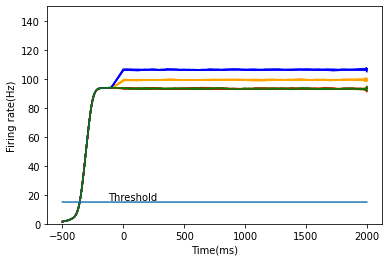

In [3]:
plt.figure

for cprime in [0.99]:
    for i in range(5):
        result = experiment(cprime)
        hue = ['orange','red','blue','green']
      
        plt.plot(time * 1000, smoothing(result[0]), color=hue[0])
        plt.plot(time * 1000, smoothing(result[1]), color=hue[1])
        plt.plot(time * 1000, smoothing(result[2]), color=hue[2])
        plt.plot(time * 1000, smoothing(result[3]), color=hue[3])
        
plt.plot(time * 1000, 15 * np.ones(steps))
plt.xlabel('Time(ms)')
plt.ylabel('Firing rate(Hz)')
plt.ylim(0,150)
plt.text(-125, 16, 'Threshold')
plt.savefig('./con99.png')
plt.show()

1. Define visualization function
2. run brainpy runner